In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys

In [3]:
# !pip -q install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
_ = plt.figure(figsize=(12, 9))

<Figure size 864x648 with 0 Axes>

In [6]:
sns.set_style("darkgrid")

## Load Data

In [7]:
df = pd.read_csv("../data/raw/Reviews.csv")

In [8]:
df.shape

(568454, 10)

In [9]:
sys.getsizeof(df)

467424856

In [10]:
df.sample(n=5).reset_index(drop=True)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,476767,B008BY7NSE,A35XEO8VRGERB9,loveit,0,0,5,1338076800,Not missing the fat at all!! LOVE IT!,I bought this as I am trying to cut out some f...
1,149003,B004Q3LBTG,A23L3VSN9LV9RN,mom2boys,2,2,1,1341187200,Great machine for a short amount of time - lea...,We ordered the Baby Brezza and I was excited t...
2,402510,B000EML7DS,A3IDV7GRSNHM5X,Noell Milota,1,2,2,1286841600,"I like most low-carb snacks, but ...","These have a very odd flavor, and are WAY too ..."
3,553105,B001E5E0TW,A2HS1RQ56EMB7V,Max Miller,1,1,5,1217721600,"Good, strong coffee...",This coffee is perfect for those who enjoy a s...
4,543941,B006MONQMC,A1ZU55TM45Y2R8,J. Haggard,0,0,3,1339977600,It tastes like watered down fruit punch... no ...,I'm not one of those guys that likes fresh lem...


In [11]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


## Field wise Analysis

### ProductId

Unique for each different product

In [12]:
df["ProductId"].nunique()

74258

In [13]:
df["ProductId"].value_counts().head()

B007JFMH8M    913
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B0026RQTGE    632
Name: ProductId, dtype: int64

In [14]:
df["ProductId"].value_counts().tail(50000)

B0030N3JA2    4
B006JQ2W6O    4
B005DGICN8    4
B001HNUADQ    4
B005HGAV7O    4
             ..
B0000ZHYWM    1
B001HN5O46    1
B007JRYQ4I    1
B005QTDV10    1
B000LRG0KG    1
Name: ProductId, Length: 50000, dtype: int64

### Making Sense of Data

Check if product ids are of uniform length

In [15]:
df["ProductId"].str.len().value_counts()

10    568454
Name: ProductId, dtype: int64

**TODO** - Implement a regex check to validate if all the product ids follow a particular pattern `B00[0-9][A-Z]*4[0-9|A-Z]*2`

In [16]:
pd.set_option('display.max_colwidth', None)

**Verify if the dataset contains text explicitly about food products. Here, we focus on products with single reviews**

In [17]:
df.loc[df["ProductId"].isin(df["ProductId"].value_counts().tail(10).index.tolist())]["Text"].to_frame()

,Text
122627,I found them to be alittle on the hard side. but I loved the cranberries
164749,cant get this at my pet store any longer and it's all she'll eat. It arrived quickly and has made her very happy.
172107,This item shipped quickly and looked nice but it fell apart after about two weeks. Look elsewhere for a komboloi.
302769,"The couscous was very good. Easy to follow directions on the container, and it turned out well. The price is low too, which is a bonus."
419958,"these were delicious in my kimchi fritters. i soak the lentils for a few hours, then puree to make the batter base for the fritters. i'm going to stock up."
438472,"I've never done a review before so please bear with me... i live in rural wyoming, so even though this company boasted over night shipping, that means to me two days... i ordered monday feb 27 hoping for wed feb 29 delivery... and my confirmation email said delivery 29th or 30th... i was hoping for the 29th since that is our wedding anniversary... only get one every four years so it's gotta be special... low and behold their overnight delivery was truly overnight, even to my corner of the world... was glad that it was early and not late...<br /><br />had hubby open it up immediately because it was precious cargo... beautiful presentation for the product... thought i read where it couldn't be gift wrapped but this was beautifully gift wrapped... i know he loves it because he's a foodie, and works in the food industry world... he has been savouring every tidbit of the caviar as opposed to devouring it... thank you for your awesome product and service"
440574,The product arrived earlier than I expected and was exactly what my husband was looking for. I would order again from this site.
530951,I liked this gum but the flavor didnt last as long as I thought it would
540775,"I'm a huge fan of the Keurig but in the Summer I need my iced coffee and previously I've been using 2 k-cups, or a making a very small cup of iced coffee because I didn't want it to be watered down. I like my coffee reasonably robust although not quite as strong as some popular coffee shops make it, and I like a big cup, 20 oz. So the small cup wasn't working out for me and using 2 k-cups meant I was plowing through my box in no time at all. Today I discovered the Green Mountain French Vanilla Iced Coffee. I filled my 20 oz plastic cup with ice just like it said and set my Keurig to the cup size closest to 8 oz. YUMMY!!!!!! It's exactly what I had hoped it would be. Usually even a small amount of half and half and the ice would make my coffee too light and watered down, but it didn't. It was great, I'm hooked already and I've only had one cup. Also in case you are wondering. There are 2 less k-cups in the box, BUT each cup weighs more, .60 ounces verses .45 ounces. They simply put more coffee in the iced k-cups and the result makes me really happy. Just had my last sip which has been sitting on ice while I write my review, still yummy!!! Hope this review helps."
549606,Purchased this in hopes of flavoring coffee without sweetening it.I didn't find the flavor to be all that amazing but it was ok.If you made coffee with it then asked me to guess the flavor I wouldnt be able to.Maybe because I know its supposed to be macadamia nut that Im looking for the flavor and can find it?In the end I am still trying to find good macadamia nut flavor.


In [18]:
df.loc[df["ProductId"].isin(df["ProductId"].value_counts().tail(10).index.tolist())]["Summary"].to_frame()

,Summary
122627,raisins
164749,Pinnacle Cat Foo
172107,Poor Quality
302769,Good israeli couscous
419958,kimchi fritters
438472,Retailer exceeded my expectations
440574,wild game bags
530951,gum
540775,Iced coffe fan.
549606,Just ok in flavor


Looks like Summary & Text are in sync & Summary is representative of the review text

## UserId

In [19]:
df["UserId"].describe()

count             568454
unique            256059
top       A3OXHLG6DIBRW8
freq                 448
Name: UserId, dtype: object

About half of the reviewers are unique

In [20]:
df["UserId"].value_counts().head(10)

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: UserId, dtype: int64

In [21]:
df["UserId"].value_counts().tail(200000)

A1Y1KAC2PJ7M1B    2
A25X40XDIO1UUC    2
A21JSQVOW8PMGA    2
A30Z47HY0H62J1    2
A1TLZCRQ0ZYSYK    2
                 ..
A1UOV1B1MEBHJV    1
A2JD4XS2LNC1IQ    1
A1N1RW7PSK5YY3    1
A35MMXF7Q1UYKT    1
A3TIXFSB9JLJUZ    1
Name: UserId, Length: 200000, dtype: int64

Since about >0.2M of reviewers have a single review - it might be challenging to map their review text to scores.

In [22]:
df.loc[df["UserId"].str.strip()=="A1YUL9PCJR3JTY"]["ProductId"].value_counts()

B000CQC050    4
B000CQC05K    4
B000CQID2Y    4
B000CQG89Y    4
B004OQBC8K    4
             ..
B003ULL816    1
B0011X5S8Y    1
B00472QKGU    1
B000NU2QTU    1
B0001M0ZTI    1
Name: ProductId, Length: 309, dtype: int64

In [23]:
df.loc[(df["UserId"].str.strip()=="A1YUL9PCJR3JTY") & (df["ProductId"]=="B000CQC050")][["Text", "Score", "Summary"]]

,Text,Score,Summary
179429,"***<br />Stash's Lemon Ginger Caffeine Free Herbal Tea is a basic lemon ginger tea, tasting strongly of ginger, and full of flavorings, and oddly, even contains soy. This is one of the better commercial highly processed, non-organic teas. I much prefer organic teas that are made without artificial flavorings and certainly without soy, but if you are not picky about herb teas, and are looking something very strongly flavored as an introduction to the world of teasans and decaffeinated beverages, this would be fine. If you like your tea more subtle, with true pure tastes, and can discern complex differences between natural and commercial teas, then this definitely is not for you, and I would recommend any Numi tea, Yogi Tea, Traditional Medicinals, or even Stash's organic line of teas (which comes in a wonderful Lemon Ginger Organic Tea!)<br /><br />Stash Lemon Ginger Tea contains ginger root, lemongrass, lemon flavor, safflower, hibiscus, citric acid, and soy.<br /><br />Unfortunately, nothing special.<br />***",3,Basic Lemon Ginger Herbal Tea
179434,"****<br />Stash's Chamomile Caffeine Free Herbal Tea is one of their totally natural teas, containing only chamomile flowers. Although I do like this, it means that the tea is rather weak, but still a fine tea---just use two teabags. Many people will find this tea too subtle. I think that Stash's more natural teas seem to be a little mild and undistinguished, while their flavored teas are super-powerful, erring on the side of too powerful, overwhelming the tea drinker with all types of strong added flavorings. If I had to pick, I'd always take subtle, as you can make these teas, like this chamomile tea, stronger by doubling up on the bags, but you can't make the strongly flavored teas weaker!<br /><br />Stash Tea has been around for over 35 years, and they are moving in the direction of more organic and loose teas, more true flavors instead of added flavorings. I appreciate that their chamomile is so pure, but wish it could be a little more flavorful.<br /><br />Still, recommended.<br />****",4,"Subtle, Mild Chamomile Tea"
179450,"*****<br />Stash's Licorice Spice Caffeine Free Herbal Tea has a the sweet flavor licorice teas are known for, along with several nice spices that complement the licorice in a lovely, more-subtle-than-chai way. Licorice Spice Tea contains licorice root, cinnamon, orange peel, star anise, sarsaparilla, natural vanilla flavor, natural orange flavor, natural clove flavor, natural cardamom flavor, and natural cinnamon flavor. Sweet and delicious!<br /><br />You don't need to add anything at all to Licorice Spice Tea, even if you normally like your tea sweetened. It is perfect just as is. It also has a very smooth taste, despite all of the flavorings. The tea bags come stamped with an expiration date, which I like, so that you can be sure the tea is fresh. The date on mine is 26 months away, so you can take your time :)<br /><br />Definitely recommended.<br />*****",5,Sweet and Lovely Tea
179485,"****<br />Stash's Wild Raspberry Caffeine Free Herbal Tea is strong and fruity, great if you love the taste of raspberry and hibiscus, which I do. It contains hibiscus, orange peel, lemongrass, rosehips, natural raspberry flavor, licorice powder, and citric acid. The package says it also contains soy, but that makes little sense to me. It is a fine tasting herb tea.<br /><br />If you like a more subtle tea, you may not be crazy about Wild Raspberry. But if you like Celestial Seasonings and other commercial teas, I think that this is a good one. The reason I gave this tea four stars instead of five is that it isn't as pure as it could be (contains additives and flavorings) and I can tell. I prefer a more subtle tea. And I save five stars for the very best teas I've tried. But for those of you who like a lot of flavor, and can't taste the additives, it's just fine!<br /><br />Recommended.<br />****",4,Hibiscus and Raspberry Delight


**For different productids a single reviewer has same review text**

**Can use the text between last two breaks as an additional data field**

## ProfileName

In [24]:
df["ProfileName"].str.strip().str.upper().nunique(), df["UserId"].str.strip().str.upper().nunique()

(213222, 256059)

In [25]:
count = 0

for name in df["ProfileName"].unique():
    if df.loc[df["ProfileName"]==name]["UserId"].nunique() > 2:
        print(name)
        count += 1
    if count==10:
        break

Karl
R. James
LT
Becca
Greg
Garrett
Peggy
Doug
Chet
Marie


In [26]:
df.loc[df["ProfileName"].str.strip()=="LT"][["ProfileName", "UserId", "Text"]]

,ProfileName,UserId,Text
12,LT,A327PCT23YH90,"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat."
64079,LT,AKSY4AKCMKXIW,"I am very picky when it comes to coffee, but I've really been enjoying this product and would definitely recommend it to anyone for their choice of coffee. Very good flavor and just the right strength."
121009,LT,A2JZMZJ4D61RP0,Gluten Free Folks! You will love these. I buy them by the case. They are a staple for me. I do like rice cakes; but I like these much more.
249880,LT,A2E7AQO7EP45QB,"The jerkey tasted great however I feel the cans were very underfilled. All the cans were under half full and I know its says .44 oz but good grief, two pinches and its gone. Over priced in my opinion."
287167,LT,A2NKIHD5MDFD0A,"I use the Special K protein water mix with my daily protein drinks...it gives it an extra kick and taste great with all the favors I use; and ordering from Amazon was a breeze. In fact, I had ordered the product and it was delivered immediately~~what service!!"
306024,LT,A2QXOJWNPCYUWG,This product is delicious! I got a bottle once at a little boutique store and sort of lost it in my fridge. Well I found it again just recently after I had grilled pork chops. Yum. I had some with my pork chops AND on top of the baked potato. I love the flavor and the texture.<br /><br />I've also had this with brie or cream cheese on crackers. Yummmmm. My bottle is now empty and I'm planning on looking at the grocery store tomorrow. If they do NOT have it... I'll be back... probably buying 3 bottles.
315946,LT,A2JYPA4AL8ICG7,"The item was advertised as having no MSG, there is a sticker attached to the package that says no MSG, however the original blue package lists monosodium glutamate (which is MSG!) as ingredient."
324824,LT,A3BWHISEIKAUCY,"For those of you who like Indian food, and do not know how to cook it, or want to spend the time preparing the cuisine, these are a good way to get a decent meal on the table in the time it takes to make rice. Though not as great tasting as the Real Deal, they are okay. Our son is at college, living in an apartment, so makes a lot of his own meals. He loves these as he knows he can have a meal on the table in 20 minutes. These are also a good way to introduce those who have never had real Indian cuisine, since most are not that spicy/hot. Buying an individual pouch can be expensive, but once you find ones you like, buy a case. They keep forever in the pantry."
367646,LT,A3PPSOC2489H9N,This product works great on my hair as a hot oil treatment and conditioner. It is also great for skin care and is gentle enough for children.
385749,LT,A2W911E5RJHZ02,"One fizzie for 6 oz. of water is about right. If you use a big glass, use more fizzies.<br /><br />It does have the artificial sweetener taste to it, but our kids love this stuff. I bought them years ago, and they have asked for them regularly ever since. The place I bought them no longer carries them and it FINALLy occured to me to check Amazon, and here they are!<br /><br />The biggest problem your kids will have is waiting for the fizzie to finish fizzing before drinking it to get the full flavor. They will want to drink it while it is still fizzing. That's how kids are.<br /><br />You would buy this instead of some other kid drink because, well, it fizzes and makes itself! That's the fun of it.<br /><br />You get 6 boxes with 12 fizzies in each box. Each fizzie is individually wrapped.<br /><br />Orange does seem to be the best working flavor."


**Some profilenames have >1 UserIds - possibly because `ProfileName` field captures just the first name & these are very common names**

> Text can still be used & are unique

## HelpfulnessNumerator & HelpfulnessDenominator

In [27]:
df[["HelpfulnessNumerator", "HelpfulnessDenominator"]].describe()

,HelpfulnessNumerator,HelpfulnessDenominator
count,568454.000000,568454.00000
mean,1.743817,2.22881
std,7.636513,8.28974
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,1.00000
75%,2.000000,2.00000
max,866.000000,923.00000


In [28]:
df["HelpfulnessNumerator"].value_counts().head(15)

0     303826
1     116467
2      53727
3      29007
4      16963
5      11462
6       7387
7       5402
8       3887
9       3082
10      2453
11      2012
12      1627
13      1185
14      1009
Name: HelpfulnessNumerator, dtype: int64

<AxesSubplot:ylabel='Frequency'>

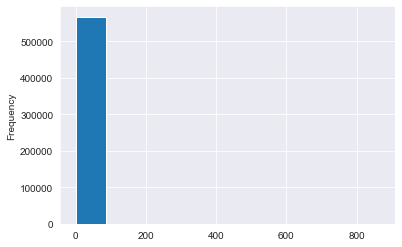

In [29]:
df["HelpfulnessNumerator"].plot(kind="hist")

HelpfulnessNumerator - Upvote

In [30]:
df["HelpfulnessDenominator"].value_counts().head(15)

0     270052
1     112753
2      61482
3      34394
4      22306
5      14824
6      10378
7       7461
8       5416
9       4406
10      3519
11      2975
12      2282
13      1854
14      1567
Name: HelpfulnessDenominator, dtype: int64

In [31]:
df.loc[df["HelpfulnessNumerator"]>df["HelpfulnessDenominator"]].shape[0]

2

In [32]:
df.loc[df["HelpfulnessNumerator"]<df["HelpfulnessDenominator"]].shape[0]

115091

In [33]:
diff = df["HelpfulnessDenominator"] - df["HelpfulnessNumerator"]

In [34]:
diff.describe()

count    568454.000000
mean          0.484993
std           1.905591
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         140.000000
dtype: float64

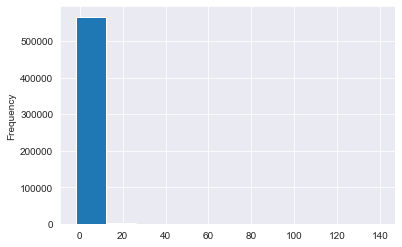

In [35]:
_ = diff.plot(kind="hist")

## Score

In [36]:
df["Score"].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

Categorisation -

* Scores 1 & 2 - Negative
* Scores 4 & 5 - Positive

In [37]:
df.loc[df["Score"].isin([1, 2]), "Class"] = "Negative"
df.loc[df["Score"].isin([4, 5]), "Class"] = "Positive"

In [38]:
df = df.loc[df["Score"].isin([1,2,4,5])]

In [39]:
df.shape

(525814, 11)

In [40]:
df = df.drop(columns=["Score"])

**Depending upon Business requirement we have currently converted it to a binary classification. We can switch back to scoring based system anytime back**

In [41]:
df["Class"].value_counts()

Positive    443777
Negative     82037
Name: Class, dtype: int64

> Not Imbalanced neither balanced

**Solutions for handling imbalance**
- SMOTE
- Undersampling
- Oversampling

https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

## Summary

In [42]:
df["Summary"].isna().sum()

25

In [43]:
df.shape

(525814, 10)

**Ignored cases where Summary is NaN & text is duplicated**

In [50]:
df.loc[df["Summary"].isna()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Class
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",Negative
40548,40549,B00020HHRW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",Negative
101106,101107,B0014B0HWK,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",Negative
102979,102980,B000FVDWU4,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",Negative
117515,117516,B0016B7Z32,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",Negative
155712,155713,B0009VO58S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",Negative
178290,178291,B00073IVAQ,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",Negative
198474,198475,B000FVBYCW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",Negative
212691,212692,B00020HHAO,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",Negative
293906,293907,B00020HHM2,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either.",Negative


In [48]:
df = df.loc[~((df["Text"].duplicated()) & (df["Summary"].isna()))]

In [49]:
df.shape

(525790, 10)

In [50]:
df["Summary"] = df["Summary"].str.strip().str.capitalize()

In [51]:
df["Summary"].nunique(), df["UserId"].nunique()

(252623, 243414)

In [52]:
df["Summary"].value_counts()

Delicious                                          2852
Delicious!                                         2742
Great product                                      2536
Yummy!                                             2006
Yummy                                              1936
                                                   ... 
Excellent bunnies                                     1
Great product for traveling with your dog!            1
The best gf cornbread i've found                      1
These are delicious! great with coffee or milk.       1
Best pasta for diabetics                              1
Name: Summary, Length: 252623, dtype: int64

### Length Distribution

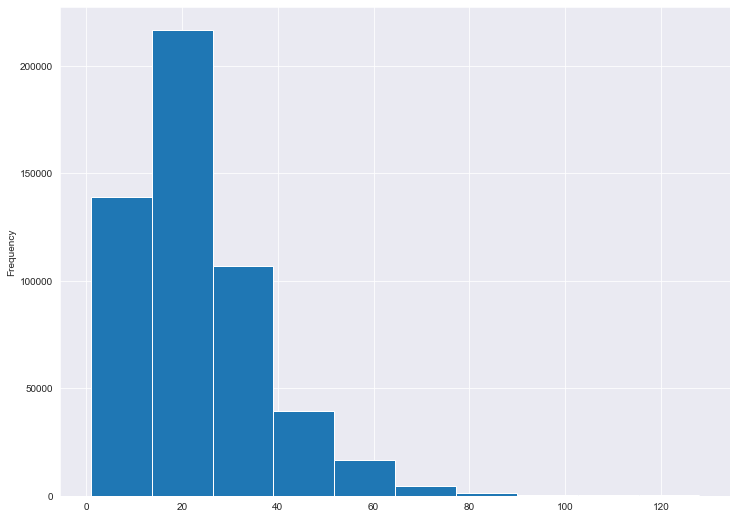

In [53]:
plt.figure(figsize=(12, 9))
_ = df["Summary"].str.len().plot(kind="hist")

### Length distribution by Class

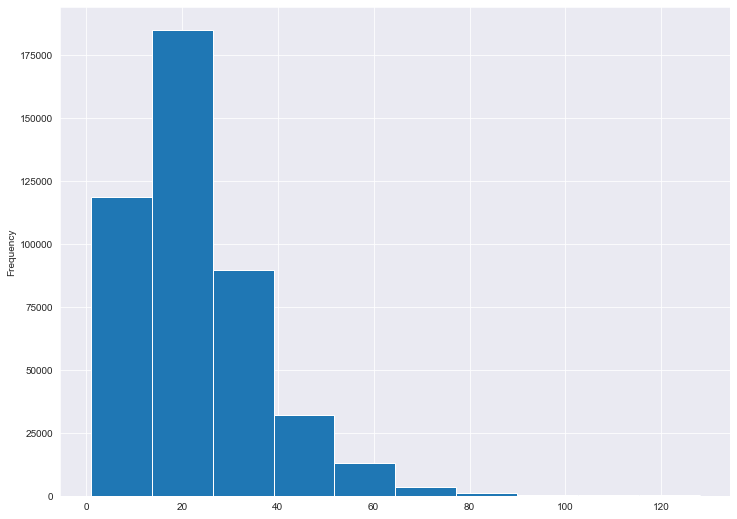

In [54]:
plt.figure(figsize=(12, 9))
_ = df.loc[df["Class"]=="Positive"]["Summary"].str.len().plot(kind="hist")

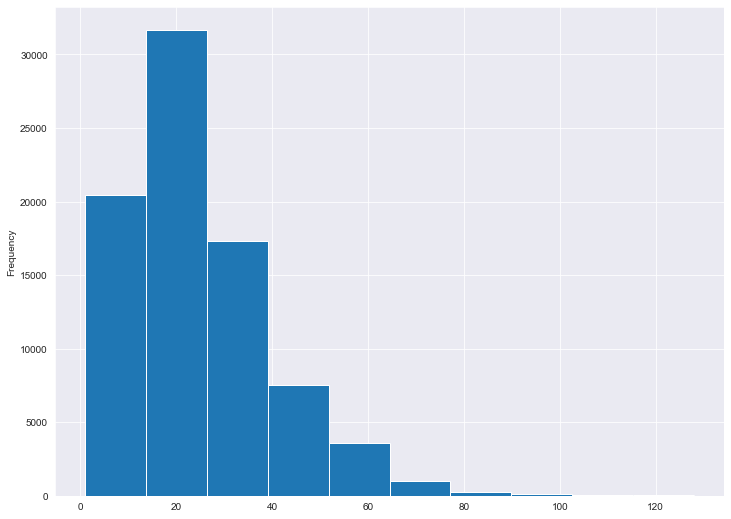

In [55]:
plt.figure(figsize=(12, 9))
_ = df.loc[df["Class"]=="Negative"]["Summary"].str.len().plot(kind="hist")

### Word distribution by Class

In [56]:
def return_len(x):
    try:
        return len(x)
    except Exception as e:
        return 0

In [57]:
df["Count"] = df["Summary"].str.split().apply(lambda x: return_len(x))

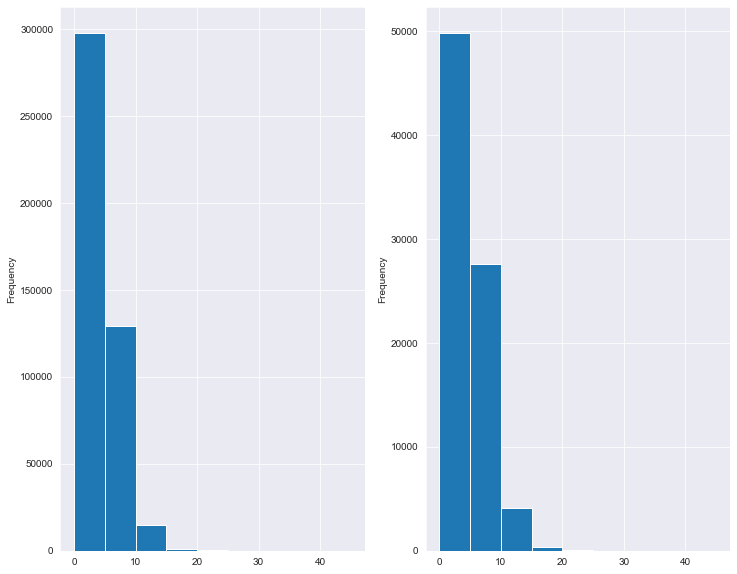

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
_ = df.loc[df["Class"]=="Positive"]["Count"].plot(kind="hist", bins=np.arange(0, 50, 5), ax=ax[0])
_ = df.loc[df["Class"]=="Negative"]["Count"].plot(kind="hist", bins=np.arange(0, 50, 5), ax=ax[1])

### WordClouds - Visual Validation

In [59]:
from wordcloud import WordCloud, STOPWORDS

In [96]:
stopwords = set(STOPWORDS)

In [97]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=20000,
        max_font_size=60, 
        scale=3,
        random_state=1,
        collocation_threshold=10
        )
    
    wordcloud=wordcloud.generate(str(data))
    plt.imshow(wordcloud,interpolation='nearest')
    plt.axis('off')

In [98]:
positive_summary = df.loc[df["Class"]=="Positive"]["Summary"]

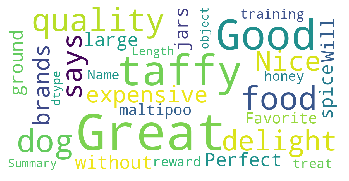

In [99]:
show_wordcloud(positive_summary, title="Positive Class")

* dtype
* Summary

**Investigate these cases**

In [77]:
df.loc[df["Summary"].fillna("").str.lower().str.contains("object")]

Id   ProductId          UserId  \
7963      7964  B004WM0ZTS  A20EEWWSFMZ1PN   
14597    14598  B0032BXUJM   AWEE52QL9WOR6   
101269  101270  B000IUPND6   ALY6UJUJCXBRE   
110620  110621  B00438XVGU  A20EEWWSFMZ1PN   
115522  115523  B000WFUL3E   AIDL4DGVARK25   
146490  146491  B000WFKWDI   AIDL4DGVARK25   
171391  171392  B000WFORH0   AIDL4DGVARK25   
191540  191541  B000WFN0VO   AIDL4DGVARK25   
211242  211243  B000WFU8O6   AIDL4DGVARK25   
221179  221180  B00269E0WW  A1L91NLNUQSOEW   
241788  241789  B0081XPTBS  A24E01BFFPXZUS   
274512  274513  B001SB2I9Q  A1L91NLNUQSOEW   
277990  277991  B000WFKI82   AIDL4DGVARK25   
301277  301278  B003Z6ZGZK  A20EEWWSFMZ1PN   
320261  320262  B003Z6W32E  A20EEWWSFMZ1PN   
343249  343250  B000WFEN74   AIDL4DGVARK25   
352349  352350  B0045IO37Y   AWEE52QL9WOR6   
357001  357002  B000WFRQQ4   AIDL4DGVARK25   
358234  358235  B0032CJPOK  A24E01BFFPXZUS   
383700  383701  B00451WLYI  A20EEWWSFMZ1PN   
410246  410247  B000084EZ4   AIDL4DGVARK25   
433408  433409  B002UZW4LG  A3DMB38LUB5N38   
437093  437094  B000WFPJIG   AIDL4DGVARK25   
486095  486096  B00008CQVA   AIDL4DGVARK25   
503049  503050  B000KIH8KM  A2DYMDOAJURO5F   
513037  513038  B000YT7EF6   AROPFTWDVH5QM   

                                     ProfileName  HelpfulnessNumerator  \
7963                          bernie "webviator"                     4   
14597                                Jason Perry                     2   
101269                                      Andy                     1   
110620                        bernie "webviator"                     3   
115522                                      zooz                     5   
146490                                      zooz                     5   
171391                                      zooz                     5   
191540                                      zooz                     5   
211242                                      zooz                     5   
221179                                  C. Rapha                     2   
241788                                    Steven                     1   
274512                                  C. Rapha                     3   
277990                                      zooz                     5   
301277                        bernie "webviator"                     3   
320261                        bernie "webviator"                     3   
343249                                      zooz                     5   
352349                               Jason Perry                     2   
357001                                      zooz                     5   
358234                                    Steven                     1   
383700                        bernie "webviator"                     3   
410246                                      zooz                     5   
433408                       D.D. "&#60;dd&#62;"                     3   
437093                                      zooz                     5   
486095                                      zooz                     5   
503049  Aceto "Hope is a Weed Exasperatus: 1:18"                     2   
513037                                 B. Houser                     2   

        HelpfulnessDenominator        Time  \
7963                         5  1281830400   
14597                        2  1335225600   
101269                       1  1348531200   
110620                       3  1342828800   
115522                       5  1298592000   
146490                       5  1298592000   
171391                       5  1298592000   
191540                       5  1298592000   
211242                       5  1298592000   
221179                      10  1292457600   
241788                       4  1302652800   
274512                      14  1292457600   
277990                       5  1298592000   
301277                       3  1342828800   
320261                       3  1342828800   
343249                       5  12

In [100]:
negative_summary = df.loc[df["Class"]=="Negative"]["Summary"]

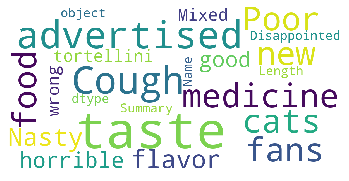

In [101]:
show_wordcloud(negative_summary, title="Negative Class")

In [102]:
df.loc[df["Summary"].fillna("").str.lower().str.contains("summary")]["Summary"].tolist()

['Description, summary, review -- 6 lb cat, several years of these treats',
 'Summary: think flavor-less gum + xylitol mouth wash coating']

**This tells us something about data collection - probably some autofill or form data collection**

TODO - Investigate dtype

### Unigrams - Most Frequent

In [142]:
from tqdm.notebook import tqdm

In [108]:
from collections import Counter

In [121]:
def get_count_words(cls):
    words = []
    for summary in tqdm(df.loc[df["Class"]==cls]["Summary"].str.strip().str.lower().tolist()):
        try:
            words.extend(summary.split())
        except:
            print(f"Error: {summary}")
    words = Counter(words)
    keys = set(words.keys()) - set(STOPWORDS)
    words = {k:words[k] for k in list(keys)}
    return words

**Ignore stopwords**

* Words - Dictionary
* Removing STOPWORDS by set difference between words in summary & STOPWORDS

**Positive Class**

In [122]:
words = get_count_words("Positive")

  0%|          | 0/443777 [00:00<?, ?it/s]

In [123]:
len(words)

61893

In [129]:
word = list(words.keys())
count = list(words.values())
temp = pd.DataFrame.from_dict({"Words": word, "Counts": count})
temp = temp.sort_values(by="Counts", ascending=False)

In [136]:
temp.head(10)

,Words,Counts
34108,great,63219
39845,good,36161
60118,best,29712
4757,love,25224
32242,coffee,16869
6725,tea,15343
52619,delicious,11633
35303,excellent,11596
7533,product,10871
47012,dog,10240


**Negative Class**

In [137]:
words = get_count_words("Negative")

  0%|          | 0/82013 [00:00<?, ?it/s]

Error: nan


In [138]:
len(words)

24572

In [139]:
word = list(words.keys())
count = list(words.values())
temp = pd.DataFrame.from_dict({"Words": word, "Counts": count})
temp = temp.sort_values(by="Counts", ascending=False)

In [141]:
temp.head(20)

,Words,Counts
17983,taste,3247
7111,good,3053
6673,-,2107
18004,bad,1902
5975,product,1902
1191,coffee,1642
10644,flavor,1612
2639,great,1567
12814,dog,1468
2349,tastes,1441


### Bigram Analysis

### Puncutation Analysis

## Review Text

In [143]:
df["Text"].isna().sum()

0

In [144]:
df["Text"] = df["Text"].str.strip().str.capitalize()

### Length Distribution - Characterwise

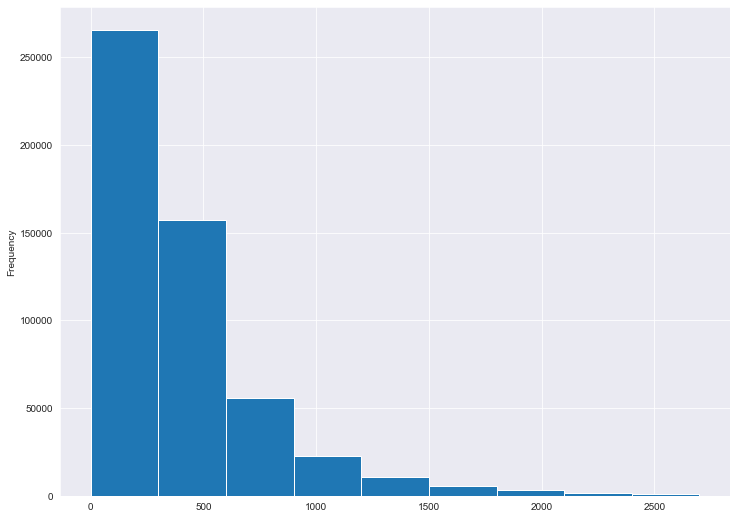

In [149]:
plt.figure(figsize=(12, 9))
_ = df["Text"].str.len().plot(kind="hist", bins=np.arange(0, 3000, 300))

### Length distribution by Class

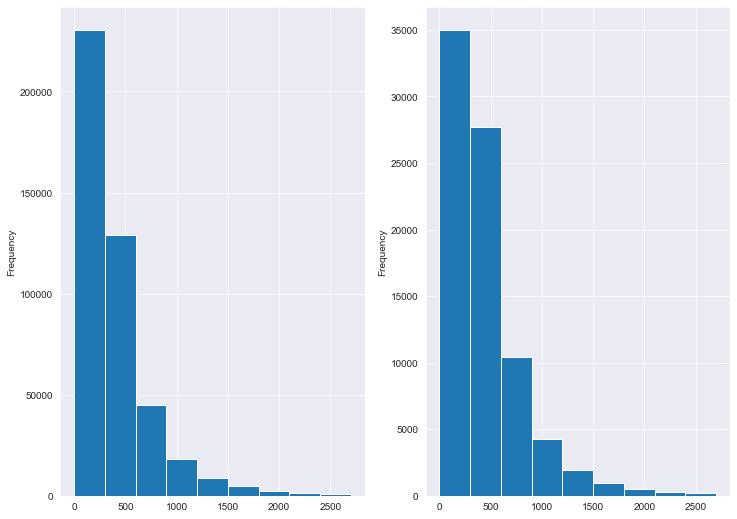

In [158]:
fig, ax = plt.subplots(1, 2, figsize=(12, 9))
_ = df.loc[df["Class"]=="Positive"]["Text"].str.len().plot(kind="hist", bins=np.arange(0, 3000, 300), ax=ax[0])
_ = df.loc[df["Class"]=="Negative"]["Text"].str.len().plot(kind="hist", bins=np.arange(0, 3000, 300), ax=ax[1])

### Word distribution by Class

In [159]:
def return_len(x):
    try:
        return len(x)
    except Exception as e:
        return 0

In [160]:
df["Count"] = df["Text"].str.split().apply(lambda x: return_len(x))

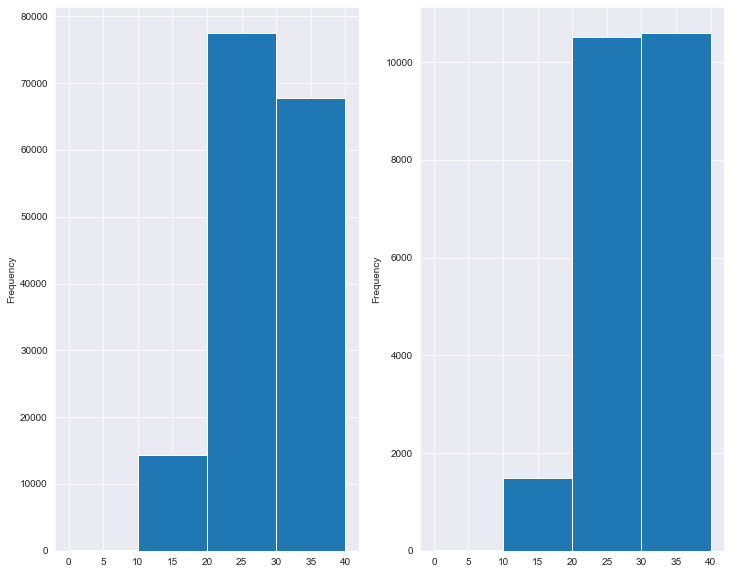

In [163]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
_ = df.loc[df["Class"]=="Positive"]["Count"].plot(kind="hist", bins=np.arange(0, 50, 10), ax=ax[0])
_ = df.loc[df["Class"]=="Negative"]["Count"].plot(kind="hist", bins=np.arange(0, 50, 10), ax=ax[1])

In [170]:
pos, neg = [], []

for i in tqdm(range(100)):
    pos_counts = df.loc[(df["Class"]=="Positive") & (df["Count"]==i)].shape[0]
    neg_counts = df.loc[(df["Class"]=="Negative") & (df["Count"]==i)].shape[0]
    pos.append(pos_counts)
    neg.append(neg_counts)

  0%|          | 0/100 [00:00<?, ?it/s]

In [171]:
temp = pd.DataFrame({"Length": range(100), "Pos": pos, "Neg": neg})

In [175]:
temp["Ratio"] = temp["Pos"]/temp["Neg"]
temp["Ratio"] = temp["Ratio"].apply(lambda x: np.ceil(x))

In [177]:
temp.iloc[20:30]

,Length,Pos,Neg,Ratio
20,20,8018,962,9.0
21,21,8093,1103,8.0
22,22,8099,1131,8.0
23,23,8244,1126,8.0
24,24,8167,959,9.0
25,25,7785,1153,7.0
26,26,7438,993,8.0
27,27,7521,1101,7.0
28,28,7231,1039,7.0
29,29,6879,954,8.0


In [178]:
temp["Ratio"].value_counts()

5.0     33
6.0     26
7.0     13
8.0      8
9.0      3
10.0     3
inf      3
12.0     2
11.0     1
35.0     1
44.0     1
4.0      1
3.0      1
1.0      1
Name: Ratio, dtype: int64

**There's nothing special/reveling in the text length. This represents the data distribution itself**

### WordClouds - Visual Validation

In [179]:
from wordcloud import WordCloud, STOPWORDS

In [180]:
stopwords = set(STOPWORDS)

In [193]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=20000,
        max_font_size=60, 
        scale=3,
        random_state=1,
        min_font_size=8,
        collocation_threshold=10
        )
    
    wordcloud=wordcloud.generate(str(data))
    plt.imshow(wordcloud,interpolation='nearest')
    plt.axis('off')

In [194]:
positive_summary = df.loc[df["Class"]=="Positive"]["Text"]

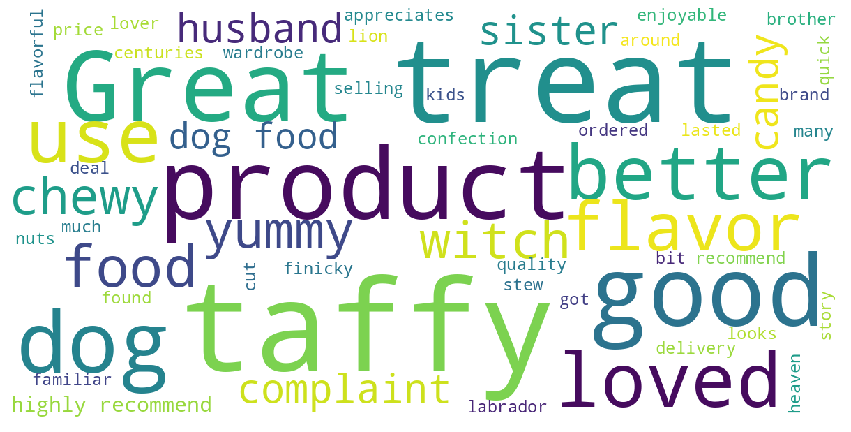

In [195]:
plt.figure(figsize=(15, 10))
show_wordcloud(positive_summary, title="Positive Class")

In [196]:
negative_summary = df.loc[df["Class"]=="Negative"]["Text"]

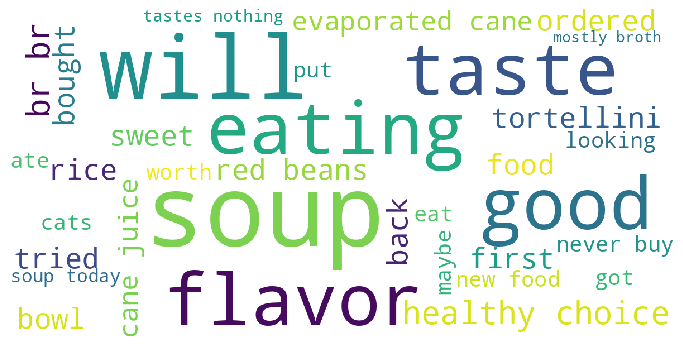

In [198]:
plt.figure(figsize=(12, 9))
show_wordcloud(negative_summary, title="Negative Class")

### Unigrams - Most Frequent

In [199]:
from tqdm.notebook import tqdm

In [200]:
from collections import Counter

In [202]:
def get_count_words(cls):
    words = []
    for summary in tqdm(df.loc[df["Class"]==cls]["Text"].str.strip().str.lower().tolist()):
        try:
            words.extend(summary.split())
        except:
            print(f"Error: {summary}")
    words = Counter(words)
    keys = set(words.keys()) - set(STOPWORDS)
    words = {k:words[k] for k in list(keys)}
    return words

**Ignore stopwords**

* Words - Dictionary
* Removing STOPWORDS by set difference between words in summary & STOPWORDS

**Positive Class**

In [203]:
words = get_count_words("Positive")

  0%|          | 0/443777 [00:00<?, ?it/s]

In [204]:
len(words)

414784

In [205]:
word = list(words.keys())
count = list(words.values())
temp = pd.DataFrame.from_dict({"Words": word, "Counts": count})
temp = temp.sort_values(by="Counts", ascending=False)

In [206]:
temp.head(10)

,Words,Counts
354389,/><br,188128
236098,great,119410
137657,good,118567
286192,one,115222
211616,love,107131
262984,will,94294
355921,taste,88979
389885,coffee,87021
109694,tea,76555
46535,really,74200


**Negative Class**

In [207]:
words = get_count_words("Negative")

  0%|          | 0/82013 [00:00<?, ?it/s]

In [208]:
len(words)

156271

In [209]:
word = list(words.keys())
count = list(words.values())
temp = pd.DataFrame.from_dict({"Words": word, "Counts": count})
temp = temp.sort_values(by="Counts", ascending=False)

In [210]:
temp.head(20)

,Words,Counts
110832,/><br,41498
112045,taste,24114
59576,one,23759
4811,product,23040
41955,will,19937
122757,even,15921
54692,food,15788
103336,good,15746
137591,coffee,15627
27009,buy,14111


### Bigram Analysis

### Punctuation Analysis